In [22]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

In [23]:
DATA_DIR = os.path.join('data')

print (DATA_DIR)

data


In [24]:
all_data = pd.read_csv(os.path.join(DATA_DIR,'merged_data.csv'))
all_data.shape

(9590, 324)

In [25]:
all_data = all_data.drop('orgs', axis=1)
all_data = all_data.drop('ownerName', axis=1)
all_data = all_data.drop('userType', axis=1)
all_data = all_data.drop('ownerType', axis=1)
all_data = all_data[all_data['Java'].notnull()]
all_data = all_data[all_data['publicRepos'].notnull()]
print(all_data.shape)
all_data.head()

(8394, 319)


,publicRepos,stars,forks,Java,Shell,Groovy,TypeScript,JavaScript,Batchfile,Ruby,...,Tea,Shen,MQL4,BlitzMax,X10,Moocode,MQL5,NCL,ooc,Zimpl
id,,,,,,,,,,,,,,,,,,,,,
1,6.0,0.0,1.0,0.0,0.0,0.0,0.0,211510.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,28440350.0,96594.0,0.0,0.0,17185.0,96511.0,455289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,2.0,6.0,58032.0,0.0,0.0,0.0,3638901.0,1040.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,114.0,116.0,50.0,18355867.0,2992731.0,66285.0,170462.0,9169679.0,43361.0,33743.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,68.0,62.0,20.0,460567.0,67077.0,2401.0,42413.0,20753734.0,1104.0,1252706.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
features = all_data.drop('stars', axis=1)
outcome = np.ravel(all_data[['stars']])

In [27]:
scaler = MinMaxScaler()
model = RandomForestRegressor()
pipe = make_pipeline(scaler, model)
param_grid = { 'randomforestregressor__n_estimators':[100],
              'randomforestregressor__max_features':['auto'],
              'randomforestregressor__max_depth':[None],
              'randomforestregressor__min_samples_split':[4],
              'randomforestregressor__random_state':[11]
             }
grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', n_jobs=6, cv=5)
grid.fit(features, outcome)
print(grid.best_params_)
print(grid.best_score_)
grid_preds = grid.predict(features)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__random_state': 11}
-75640937.7465


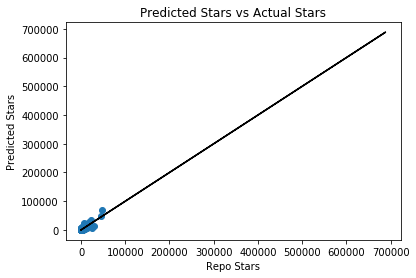

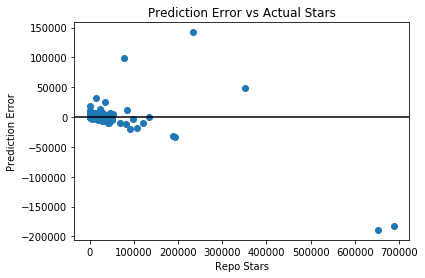

In [41]:
plt.scatter(test_outcome, test_preds)
plt.title('Predicted Stars vs Actual Stars')
plt.xlabel("Repo Stars")
plt.ylabel("Predicted Stars")
plt.plot(outcome, outcome, color='black')
plt.savefig("./pred_vs_actual.svg", format="svg")
plt.show()

plt.scatter(test_outcome, test_preds - test_outcome)
plt.title('Prediction Error vs Actual Stars')
plt.xlabel("Repo Stars")
plt.ylabel("Prediction Error")
plt.axhline(0, color='black')
plt.savefig("./pred_error.svg", format="svg")
plt.show()

In [29]:
output = pd.DataFrame(data={'Actual Stars':test_outcome, 'Predicted Stars':test_preds})
output

,Actual Stars,Predicted Stars
0,57.0,75.318119
1,32.0,162.862024
2,16.0,23.658095
3,16.0,9.003702
4,231.0,819.586246
5,107.0,47.982750
6,636.0,2185.226075
7,2.0,2.602500
8,1.0,0.556476
9,4.0,2.147845


In [30]:
output.to_csv(os.path.join(DATA_DIR,'output.csv'))